In [1]:
import numpy as np
import pandas as pd
import random as rd

import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

sb.axes_style('whitegrid')
sb.set(rc = {'figure.figsize': (15, 8)})

from scripts.path import return_path
PATH = return_path() + 'media_network_data/'

## DATA GATHERING

In [2]:
edges = pd.read_csv(f'{PATH}edges.csv')
print(edges.shape)
display(edges.head())

nodes = pd.read_csv(f'{PATH}nodes.csv')
print(nodes.shape)
display(nodes.head())

(49, 3)


,from,to,weight
0,s01,s02,22
1,s01,s03,22
2,s01,s04,21
3,s01,s15,20
4,s02,s01,23


(17, 2)


,id,media
0,s01,NY Times
1,s02,Washington Post
2,s03,Wall Street Journal
3,s04,USA Today
4,s05,LA Times


## DATA CLEANING

In [3]:
# Transform nodes to dictionary
nodes_dict = nodes.set_index('id')['media'].to_dict() # id is the reference point, media is mapped element
print(nodes_dict)

# Rename edges based on dictionary
edges_cleaned = [edges[x].map(nodes_dict) for x in edges.columns if x != 'weight'] # edges['from'].map(nodes_dict) # map based on dictionary
edges_cleaned = pd.DataFrame(edges_cleaned).T
edges_cleaned['weight'] = edges['weight']
display(edges_cleaned.head())

{'s01': 'NY Times', 's02': 'Washington Post', 's03': 'Wall Street Journal', 's04': 'USA Today', 's05': 'LA Times', 's06': 'New York Post', 's07': 'CNN', 's08': 'MSNBC', 's09': 'FOX News', 's10': 'ABC', 's11': 'BBC', 's12': 'Yahoo News', 's13': 'Google News', 's14': 'Reuters.com', 's15': 'NYTimes.com', 's16': 'WashingtonPost.com', 's17': 'AOL.com'}


,from,to,weight
0,NY Times,Washington Post,22
1,NY Times,Wall Street Journal,22
2,NY Times,USA Today,21
3,NY Times,NYTimes.com,20
4,Washington Post,NY Times,23


In [4]:
# Create nodes
graph_nodes = list(set(nodes['media']))
print(graph_nodes, '\n')

# Create edges
graph_edges = list()
for x in range(len(edges_cleaned)):
    graph_edges.append(list(edges_cleaned.iloc[x]))

# Include weight dict
for x in graph_edges:
    x[2] = {'weight': x[2]}

# Transform edges to tuple
graph_edges2 = list()
for x in graph_edges:
    graph_edges2.append(tuple(x))
print(graph_edges2[0:5])  


['LA Times', 'AOL.com', 'FOX News', 'CNN', 'MSNBC', 'NY Times', 'ABC', 'WashingtonPost.com', 'Wall Street Journal', 'Yahoo News', 'Reuters.com', 'BBC', 'USA Today', 'NYTimes.com', 'New York Post', 'Washington Post', 'Google News'] 

[('NY Times', 'Washington Post', {'weight': 22}), ('NY Times', 'Wall Street Journal', {'weight': 22}), ('NY Times', 'USA Today', {'weight': 21}), ('NY Times', 'NYTimes.com', {'weight': 20}), ('Washington Post', 'NY Times', {'weight': 23})]


### NO WEIGHTS

In [5]:
# Create graph
G = nx.Graph()
G.add_nodes_from(graph_nodes)
G.add_edges_from(graph_edges)

# Set color
nodes_from = [x[0] for x in graph_edges]
nodes_from = LabelEncoder().fit_transform(nodes_from)
colors = list(sb.color_palette(palette='dark', n_colors=len(nodes_from)).as_hex())

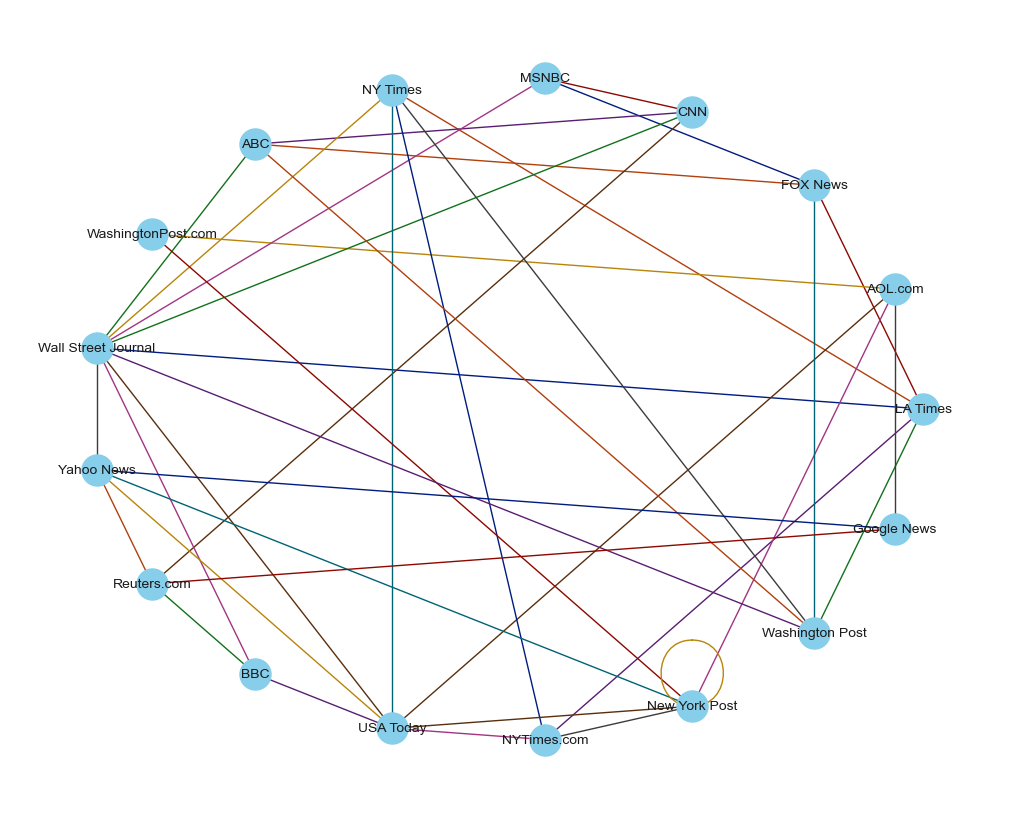

In [6]:
# Circular Layout
plt.figure(1, figsize=(10, 8)) 
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, 
    node_size=500, font_size=10, node_color='skyblue',
    edge_color=colors, edge_cmap=plt.cm.Blues) # '#00b4d9')
plt.show()

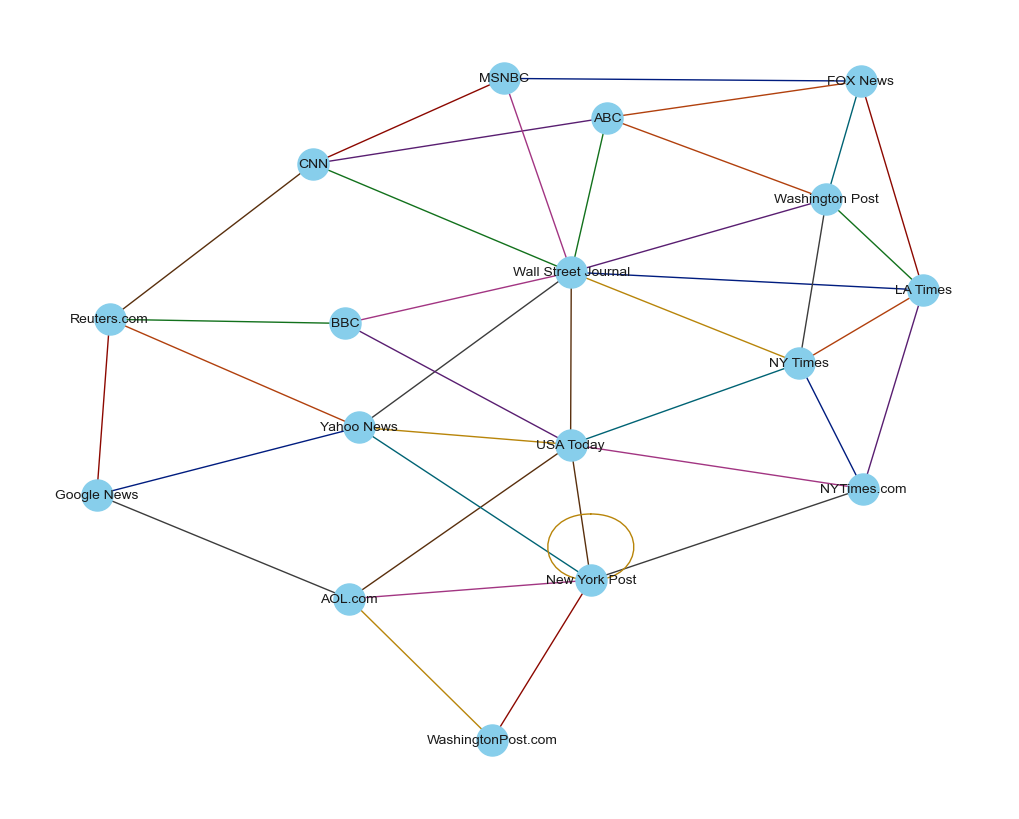

In [7]:
# Kamada Kawai Layout
plt.figure(1, figsize=(10, 8)) 
nx.draw(G, pos=nx.kamada_kawai_layout(G, scale=1, weight='width', dim=2), with_labels=True, 
    node_size=500, font_size=10, node_color='skyblue',
    edge_color=colors, edge_cmap=plt.cm.Blues) # '#00b4d9')
plt.show()

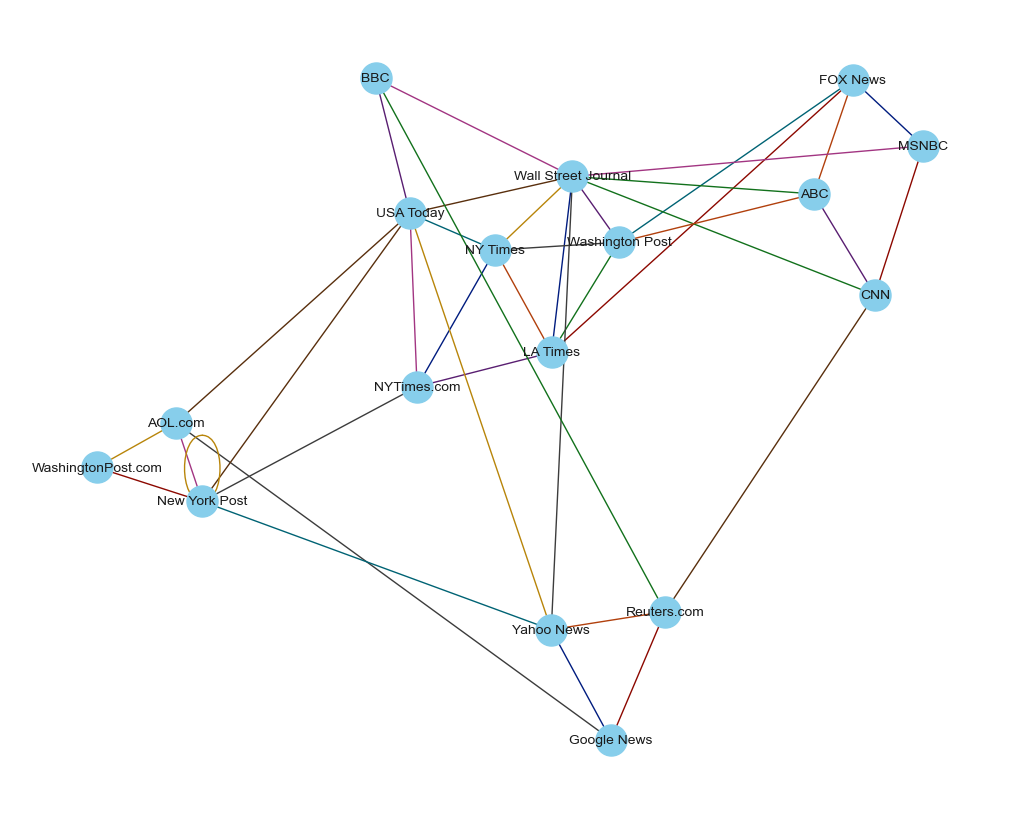

In [8]:
# Spring Layout
plt.figure(1, figsize=(10, 8)) 
nx.draw(G, pos=nx.spring_layout(G, k=0.1, iterations=20), with_labels=True, 
    node_size=500, font_size=10, node_color='skyblue',
    edge_color=colors, edge_cmap=plt.cm.Blues)
plt.show()

### WITH WEIGHTS

In [9]:
# Create graph
G = nx.Graph()
G.add_nodes_from(graph_nodes)
G.add_edges_from(graph_edges2)

# Set weights
weights = [1 if G[u][v] == {} else G[u][v]['weight'] for u, v in G.edges()]

# Set color
nodes_from = [x[0] for x in graph_edges2]
nodes_from = LabelEncoder().fit_transform(nodes_from)
colors = list(sb.color_palette(palette='dark', n_colors=len(nodes_from)).as_hex())

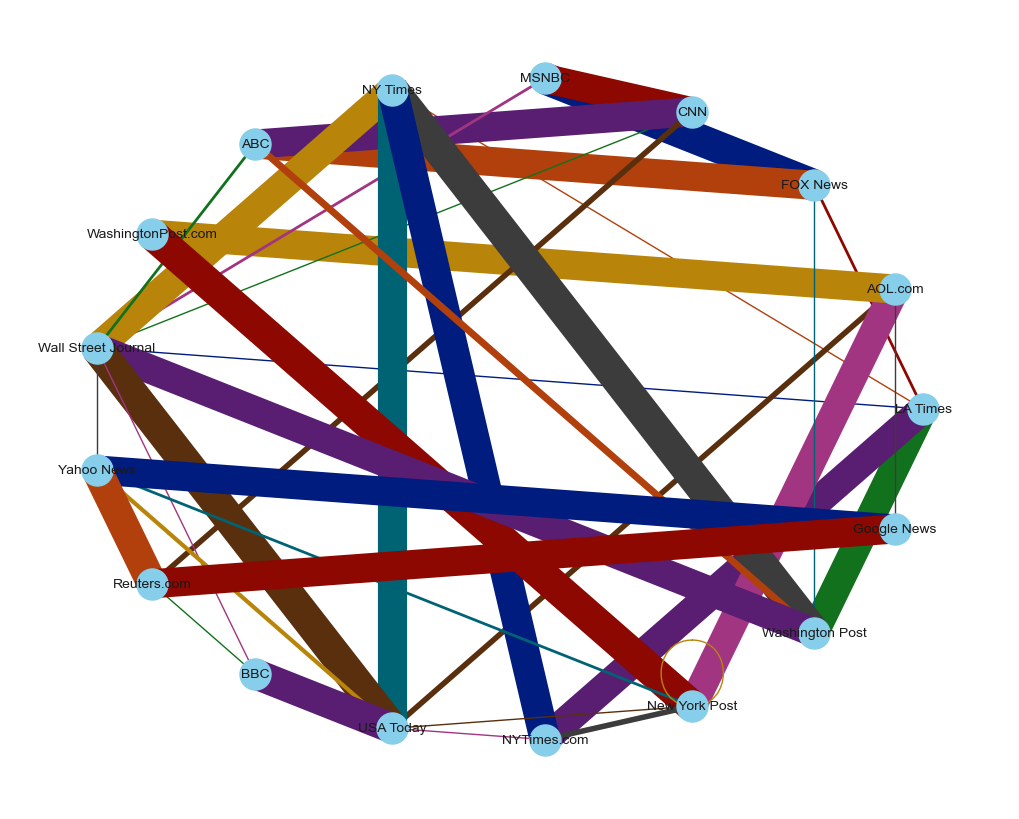

In [10]:
# Circular Layout
plt.figure(1, figsize=(10, 8)) 
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, 
    node_size=500, font_size=10, node_color='skyblue', width=weights,
    edge_color=colors, edge_cmap=plt.cm.Blues)
plt.show()

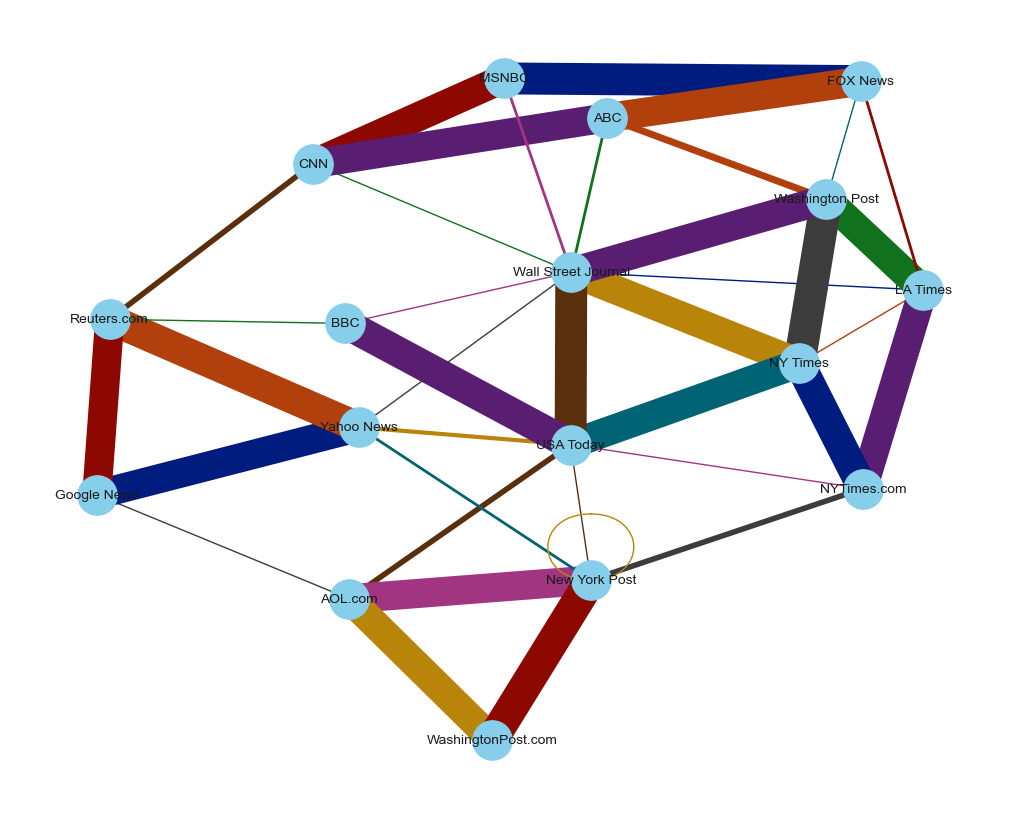

In [11]:
# Kamada Kawai Layout
plt.figure(1, figsize=(10, 8)) 
nx.draw(G, pos=nx.kamada_kawai_layout(G, scale=1, weight='width', dim=2), with_labels=True, 
    node_size=800, font_size=10, node_color='skyblue', width=weights,
    edge_color=colors, edge_cmap=plt.cm.Blues)
plt.show()

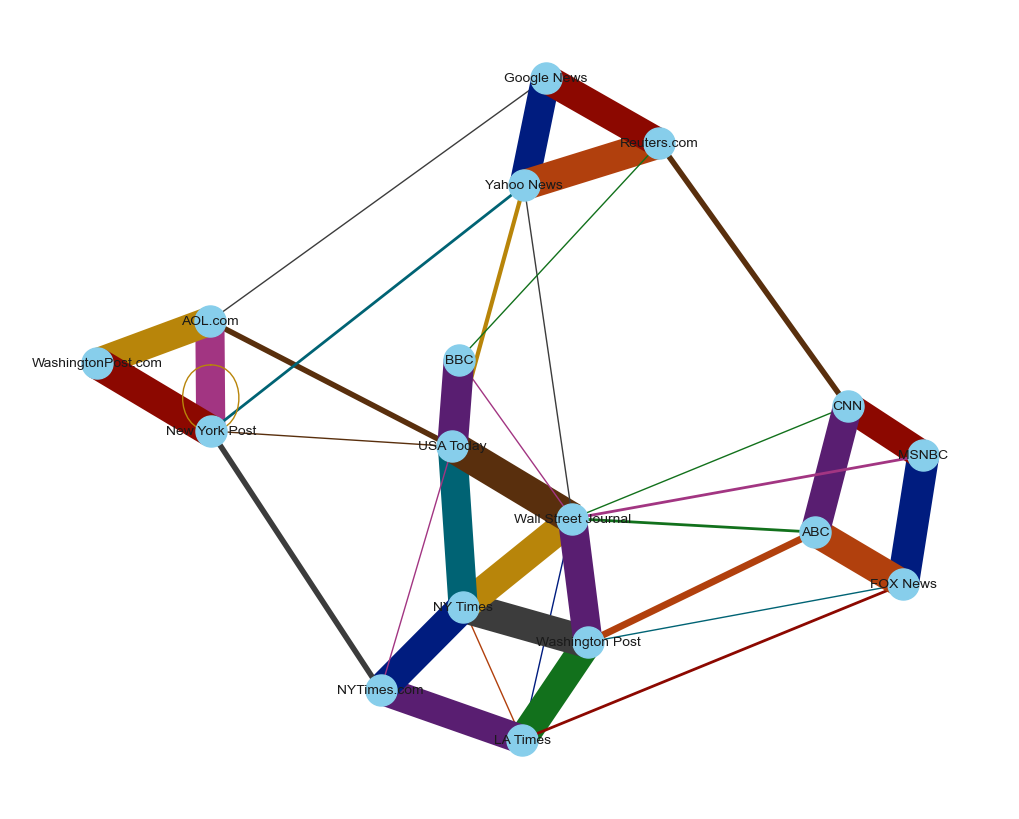

In [12]:
# Spring Layout
plt.figure(1, figsize=(10, 8)) 
nx.draw(G, pos=nx.spring_layout(G, k=0.1, iterations=20), with_labels=True, 
    node_size=500, font_size=10, node_color='skyblue', width=weights,
    edge_color=colors, edge_cmap=plt.cm.Blues)
plt.show()

## DEGREE OF ALL NODES/VERTICES

In [13]:
list_degree = list(G.degree)
degree_df = pd.DataFrame(list_degree).rename(columns={0: 'Media', 1: 'Degree'}).sort_values(by='Degree', ascending=False).reset_index(drop=True)
degree_bar = px.bar(data_frame=degree_df, x='Media', y='Degree', color='Degree', orientation=None, barmode='relative',
                title='Bar Chart Visualization of Degree of Media', width=1200, height=None)
degree_bar.update_layout(margin=dict(b=20, l=5, r=5, t=80))